<h1>Assignment Instructions</h1>

2. Eigenfaces and simple face recognition [55 points; including 5 bonus points.]

This question is a simplified illustration of using PCA for face recognition. We will use a subset of data from the famous Yale Face dataset. 

<b>Remark:</b> You will have to perform downsampling of the image by a factor of 4 to turn them into a lower resolution image as a preprocessing (e.g., reduce a picture of size 16-by-16 to 4-by-4). In this question, you can implement your own code or call packages. 

First, given a set of images for each person, we generate the eigenface using these images. You will treat one picture from the same person as one data point for that person. Note that you will first vectorize each image, which was originally a matrix. Thus, the data matrix (for each person) is a matrix; each row is a vectorized picture. You will find weight vectors to combine the pictures to extract different "eigenfaces" that correspond to that person's pictures' first few principal components. 

<br></br>
<ul> (25 points) Perform analysis on the Yale face dataset for Subject 1 and Subject 2, respectively, using all the images EXCEPT for the two pictures named subject01-test.gif and subject02-test.gif. <b>Plot the first 6 eigenfaces for each subject.</b> When visualizing, please reshape the eigenvectors into proper images. Please explain can you see any patterns in the top 6 eigenfaces?</ul>
<br></br>
<ul> (25 points) Now we will perform a simple face recognition task. </ul>
<br></br>
Face recognition through PCA is proceeded as follows. Given the test image subject01-test.gif and subject02-test.gif, first downsize by a factor of 4 (as before), and vectorize each image. Take the top eigenfaces of Subject 1 and Subject 2, respectively. Then we calculate the <i>normalized inner product score</i> of the 2 vectorized test images with the vectorized eigenfaces:
\[s_{ij} =\frac{\textsf{(eigenface})_i^T \textsf{(test image)}_j}{\|\textsf{(eigenface}_i)\| \cdot\|\textsf{(test image)}_j\|}\]

Report all four scores: $s_{ij}$, $i = 1, 2$, $j = 1, 2.$ Explain how to recognize the faces of the test images using these scores. 


<h1>Demo Code (for a different data structure than we are working with):</h1>

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


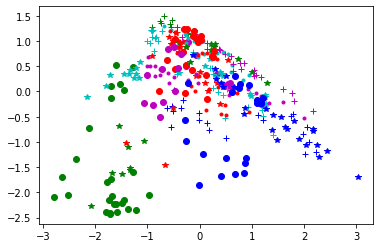

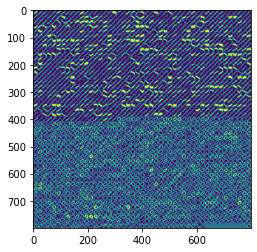

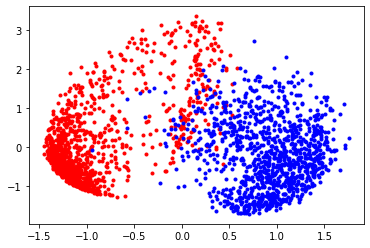

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.io as spio
import scipy.sparse.linalg as ll
import sklearn.preprocessing as skpp

# show image function
def show_image(centroids,H,W=None):
    if W == None: W = H
    N = centroids.shape[1]/(H*W)
    assert N == 3 or N == 1 # color and grey images
    
    K = centroids.shape[0]
    COLS = round(math.sqrt(K))
    ROWS = math.ceil(K/COLS)
    
    N = int(N)

    image = np.ones((ROWS*(H+1), COLS*(W+1), N))*100
    
    for i in range(centroids.shape[0]):
        r = math.floor(i / COLS)
        c = (i-1) % COLS

        image[(r*(H+1)+1):((r+1)*(H+1)),(c*(W+1)+1):((c+1)*(W+1)),:] = centroids[i,:W*H*N+1].reshape((H,W,N))
        
    plt.imshow(image[:,:,0])
    plt.show()
    
#%%
##########################
# PCA_leaf main function #
##########################
    
leaf = spio.loadmat('leaf.mat',squeeze_me=True)['M']

# dataset description
#The provided data comprises the following shape (attributes 3 to 9) and texture (attributes 10
#to 16) features:
#1. Class (Species)
#2. Specimen Number
#3. Eccentricity
#4. Aspect Ratio
#5. Elongation
#6. Solidity
#7. Stochastic Convexity
#8. Isoperimetric Factor
#9. Maximal Indentation Depth
#10. Lobedness
#11. Average Intensity
#12. Average Contrast
#13. Smoothness
#14. Third moment
#15. Uniformity
#16. Entropy

# extract attributes from raw data
Anew = leaf[:,2:17]
m,n = Anew.shape

# create indicator matrix
Inew = leaf[:,0]

# In this case, we normalize the data because features have very different ranges
stdA = np.std(Anew,axis = 0)
stdA = skpp.normalize(stdA.reshape(1,-1)) # the normalize is different from MATLAB's
Anew = Anew @ np.diag(np.ones(stdA.shape[1])/stdA[0])
Anew = Anew.T
# PCA
mu = np.mean(Anew,axis = 1)
xc = Anew - mu[:,None]

C = np.dot(xc,xc.T)/m

K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st eigenvalues
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue

color_string = 'bgrmck'
marker_string = '.+*o'
leaf_fig = plt.figure()
for i in range(int(max(Inew))):
    print(i)
    color = color_string[i % 5]
    marker = marker_string[i % 4]
    m = color + marker
    leaf_fig.gca().plot(dim1[Inew == i],dim2[Inew == i],m)

plt.show()
leaf_fig.savefig('leaf2.png')
#%%
###########################
# PCA_digit main function #
###########################

usps = spio.loadmat('usps_all.mat',squeeze_me = True)['data']
pixelno = usps.shape[0]
digitno = usps.shape[1]
classno = usps.shape[2]

H = 16
W = 16

data = np.concatenate((usps[:,:,0],usps[:,:,9]),axis = 1).T

show_image(data,H,W)
# title: 'digit 1 and 0'

x0 = data.T.reshape((pixelno,digitno*2))
x = x0.astype(float)

y = np.concatenate((np.ones(digitno),2*np.ones(digitno)))
m1 = x.shape[1]
Anew1 = x

# PCA
mu1 = np.mean(Anew1,axis = 1)
xc1 = Anew1 - mu1[:,None]

C1 = np.dot(xc1,xc1.T)/m1

K = 2
S1,W1 = ll.eigs(C1,k = K)
S1 = S1.real
W1 = W1.real

dim1_1 = np.dot(W1[:,0].T,xc1)/math.sqrt(S1[0])
dim2_1 = np.dot(W1[:,1].T,xc1)/math.sqrt(S1[1])

digit_fig = plt.figure()
digit_fig.gca().plot(dim1_1[y == 1],dim2_1[y == 1],'r.')
digit_fig.gca().plot(dim1_1[y == 2],dim2_1[y == 2],'b.')
digit_fig.savefig('digit2.png')

<h1>Draft Code (working but does not fulfill requirements):</h1>

In [ ]:
## References

# https://pythonmachinelearning.pro/face-recognition-with-eigenfaces/

In [ ]:
#Rough Steps to be followed for Part 1:
    
#1. Downscale images
#2. Vectorize images to get a (4880x10) matrix for each subject
#3. Calculate covariance matrix for each subject
#4. Find eigenvectors of C using SVD (or you can also use eigenvectors of (x-mu)) - be sure to you 
## check how the singular values are sorted and proceed accordingly. Note that different functions/packages 
## might have different situations. (This is due to the different computational algorithm those functions rely on)
#5. Use the first eigenvector of C as my eigenface for testing

#Rough Steps to be followed for part 2:

#1. Select one of the 6 eigenfaces for Subj 1 and Subj 2 from part 1
#2. Vectorize those eigenfaces
#3 Downsize test images -
#4 Vectorize the  test images 
#5 Calculate the inner product basically the cosine score

In [2]:
import matplotlib.pyplot as plt

import numpy as np
## https://scikit-image.org/docs/dev/auto_examples/transform/plot_rescale.html
## piazza post https://piazza.com/class/khkx47q2d3p5ln?cid=161_f4
from skimage.transform import rescale, resize, downscale_local_mean
import os

os.chdir("C:/Users/emian/OneDrive/Desktop/homework2-1/homework2/data/yalefaces/")


In [3]:
## Downscale image

def create_vec(image):
    # read in image
    image = plt.imread(image)
    # downscale imaage per https://piazza.com/class/khkx47q2d3p5ln?cid=161_f4
    image_down = downscale_local_mean(image, (4,4))
    # flatten image into rows https://www.w3resource.com/numpy/manipulation/ndarray-flatten.php
    image_vectorize = image.flatten("C")
    return image_vectorize


In [4]:
n = create_vec("subject01.glasses.gif")
n = np.column_stack((n, create_vec("subject01.happy.gif")))
n = np.column_stack((n, create_vec("subject01.leftlight.gif")))
n = np.column_stack((n, create_vec("subject01.noglasses.gif")))
n = np.column_stack((n, create_vec("subject01.normal.gif")))
n = np.column_stack((n, create_vec("subject01.rightlight.gif")))
n = np.column_stack((n, create_vec("subject01.sad.gif")))
n = np.column_stack((n, create_vec("subject01.sleepy.gif")))
n = np.column_stack((n, create_vec("subject01.surprised.gif")))
n = np.column_stack((n, create_vec("subject01.wink.gif")))

In [5]:
new = n.T.dot(n)

In [6]:
vals, vecs = np.linalg.eig(new)

In [7]:
vecs = -vecs[:,np.argsort(-vals)]
vals = vals[np.argsort(-vals)]

In [8]:
face = n.dot(vecs[:,0]) # compute the eigenface
face_reshape = np.reshape(face, (61,80))

ValueError: cannot reshape array of size 77760 into shape (61,80)

In [ ]:
print ("The top 6 eigenfaces of",subject_name)
    for i in range(6):
        face = n.dot(vecs[:,i]) # compute the eigenface
        face_reshape = np.reshape(face, (61,80)) # reshape the data to its original form
        plt.subplot(2,3,i+1)
        plt.title('Eigenface_'+str(i))
        plt.imshow(face_reshape,cmap="Greys_r")
        plt.axis('off')
    face_1 = n.dot(vecs[:,0])
    return face_1

In [9]:
## reference code I found - but I do not want to copy this

The top 6 eigenfaces of subject01


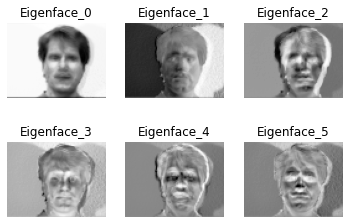

In [10]:
def vectorize(image_name):
    image = plt.imread(image_name)
    image = downscale_local_mean(image, (4,4))
    image_vectorized = image.flatten("C")
    return image_vectorized

def eigenface(subject_name):
    # get the eigenface for subject
    sub14 = [os.listdir()[i] for i in range(len(os.listdir())) if os.listdir()[i].startswith(subject_name)]

    for i in range(len(sub14)):
        if i ==0:
            n = vectorize(sub14[i])# get the first vectorized image data
        else:
            n = np.column_stack((n,vectorize(sub14[i]))) # add the rest of the image data

    new = n.T.dot(n) # compute the X^TX matrix

    # get the eigenvalues and eigenvectors
    vals, vecs =  np.linalg.eig(new)

    # sort them from high to low
    vecs = -vecs[:,np.argsort(-vals)]
    vals = vals[np.argsort(-vals)]
   

    print ("The top 6 eigenfaces of",subject_name)
    for i in range(6):
        face = n.dot(vecs[:,i]) # compute the eigenface
        face_reshape = np.reshape(face, (61,80)) # reshape the data to its original form
        plt.subplot(2,3,i+1)
        plt.title('Eigenface_'+str(i))
        plt.imshow(face_reshape,cmap="Greys_r")
        plt.axis('off')
    face_1 = n.dot(vecs[:,0])
    return face_1
face_01 = eigenface("subject01")